In [4]:
import numpy as np
import pandas as pd
from utils import go_to_project_root
import data
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# go_to_project_root()

In [11]:
f = open("data/interim/misc/trigrams.txt")
tweets = f.readlines()
f.close()
tweets = [tweet.strip() for tweet in tweets]

vectors = pd.read_csv("data/interim/misc/tsne_vectors.csv", index_col=0).to_numpy()
y = data.get_csv().iloc[:,-1].to_numpy()

In [79]:
%%time

for k in range(2, 20):
    vectors = pd.read_csv("data/interim/misc/tsne_vectors.csv", index_col=0)
    kmeans = KMeans(n_clusters=k, max_iter=3000000, n_jobs=8)
    tsne_input = kmeans.fit_transform(vectors.values)

    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(tsne_input)
    tsne_vectors = pd.DataFrame(tsne_vectors,
                                index=pd.Index(vectors.index),
                                columns=[u'x_coord', u'y_coord'])
    
    # plt.scatter(tsne_vectors["x_coord"],tsne_vectors["y_coord"])

    points = np.zeros((300, 2))
    for i, tweet in enumerate(tweets):
        vs = []
        for term in tweet.split(" "):
            if term in tsne_vectors.index:
                vs += [(tsne_vectors.loc[term].x_coord, tsne_vectors.loc[term].y_coord)]
        mean_x = np.mean([v[0] for v in vs])
        mean_y = np.mean([v[1] for v in vs])
        points[i] = np.array([mean_x, mean_y])
        
    fn = points[np.where(y==1)]
    nfn = points[np.where(y==0)]

    plt.figure(figsize=(10,10))
    plt.scatter(fn[:,0], fn[:,1], label="Fake News")
    plt.scatter(nfn[:,0], nfn[:,1], label="Not Fake News")
    plt.title(f"Clustering Word Embeddings with k = {k}")
    plt.legend()

    plt.savefig(f"reports/figures/prelim/embeddings-{k}.png")

KeyboardInterrupt: 

In [70]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
plot_data = ColumnDataSource(tsne_vectors)

tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

tsne_plot.add_tools( HoverTool(tooltips = u'@index') )

tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = True
tsne_plot.yaxis.visible = True
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

show(tsne_plot)

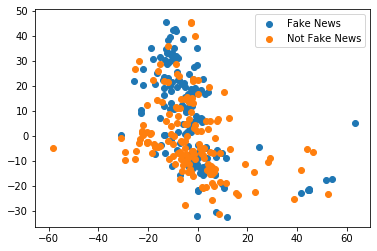

In [71]:
points = np.zeros((300, 2))
for i, tweet in enumerate(tweets):
    vs = []
    for term in tweet.split(" "):
        if term in tsne_vectors.index:
            vs += [(tsne_vectors.loc[term].x_coord, tsne_vectors.loc[term].y_coord)]
    mean_x = np.mean([v[0] for v in vs])
    mean_y = np.mean([v[1] for v in vs])
    points[i] = np.array([mean_x, mean_y])
    
fn = points[np.where(y==1)]
nfn = points[np.where(y==0)]

plt.scatter(fn[:,0], fn[:,1], label="Fake News")
plt.scatter(nfn[:,0], nfn[:,1], label="Not Fake News")
plt.legend()